In [2]:
library(raster)
library(sf)
library(ggplot2)
library(ncdf4)
library(repr)
options(repr.plot.height = 8, repr.plot.width = 16)

Loading required package: sp

Linking to GEOS 3.6.2, GDAL 2.2.3, PROJ 4.9.3



Reading layer `east_usa_nad83' from data source 
  `/smb/shared/c75f5b/MAX-Filer/Research/Climate-01/Personal-F20/araghura-F21/cee609/project/raw_data/east_usa_nad83.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 38 features and 9 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -106.6359 ymin: 24.49813 xmax: -66.9499 ymax: 49.38436
CRS:           4269


Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


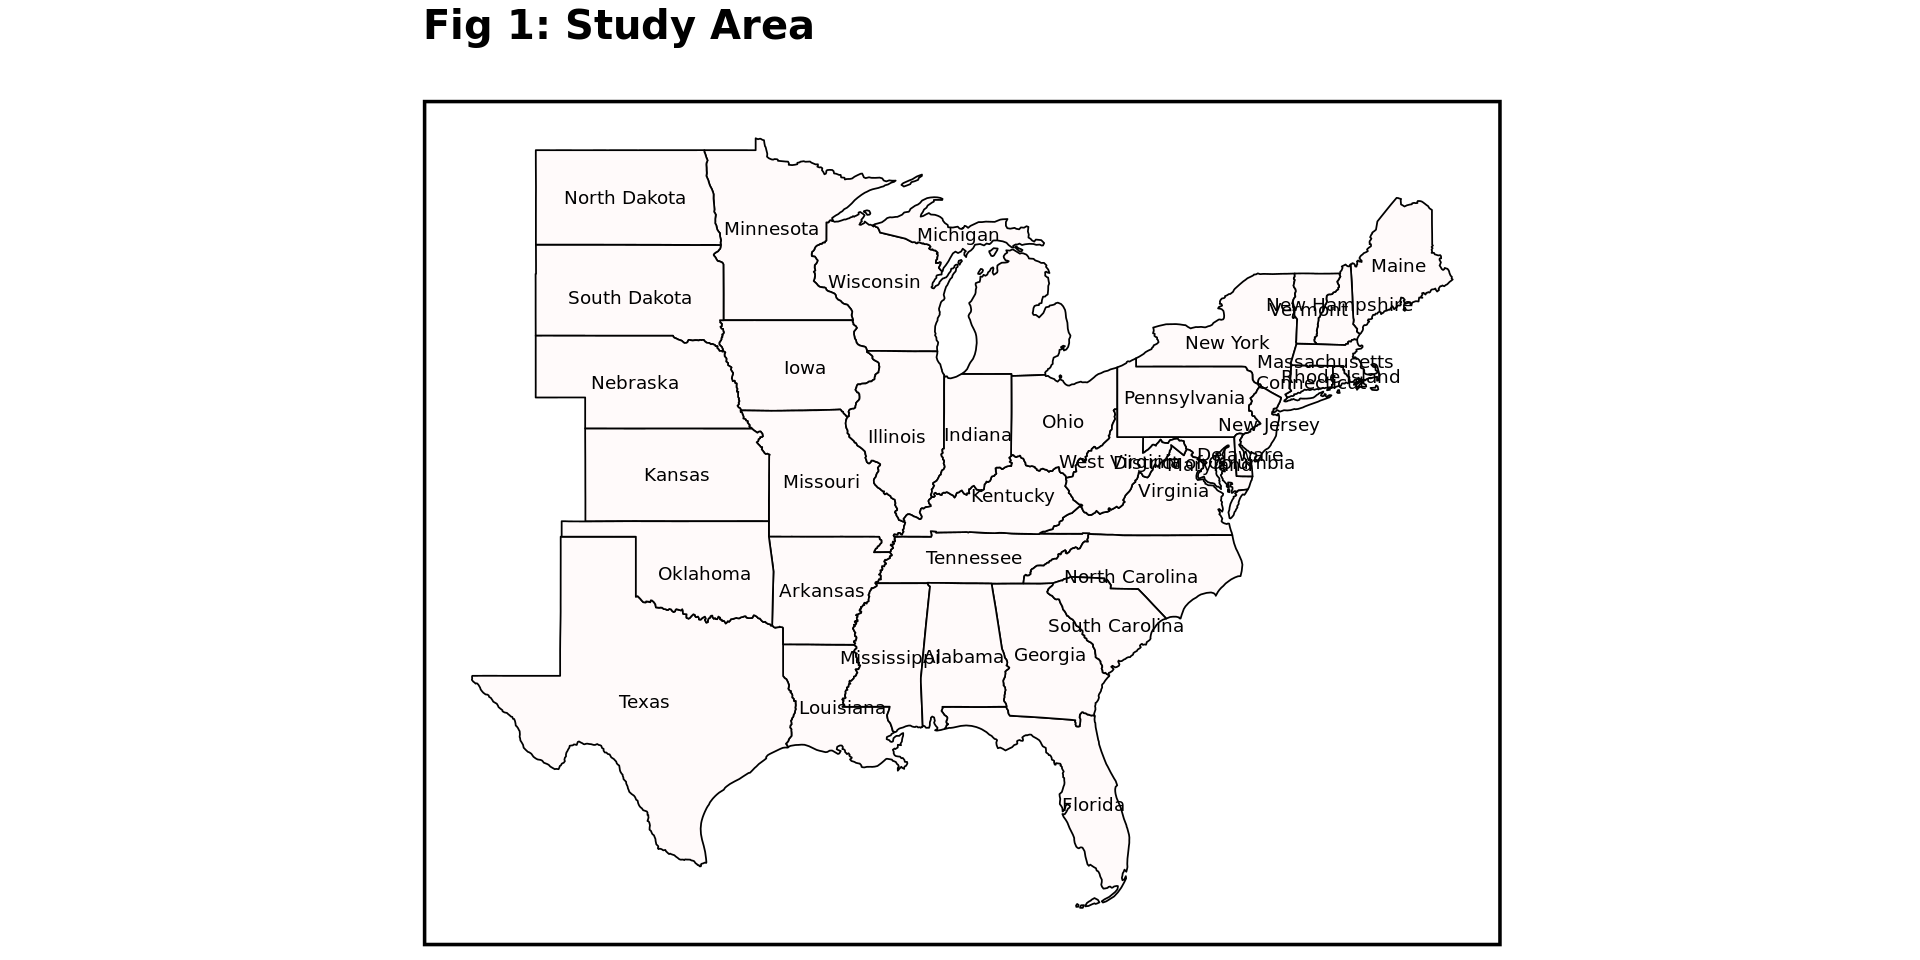

In [3]:
# Figure 1

east <- st_read('./raw_data/east_usa_nad83.shp')
ggplot(east) + geom_sf(east, mapping = aes(geometry = geometry), lwd = 0.5, fill = 'snow', color = 'black') +
geom_sf_text(aes(label = NAME), color = 'black') +
#scale_fill_gradient2('kg/ha per KDD \n',limits = c(-30,30), breaks = seq(-45,45, by = 15), low = 'red', mid = 'snow', high = 'blue', na.value = 'grey80') + 
labs(title = "Fig 1: Study Area \n",) + 
theme_bw() +
theme(plot.title = element_text(size = 24, face = 'bold'), plot.subtitle = element_text(size = 22, face = 'bold'),
      legend.key.size = unit(2, 'cm'),#change legend key size
        legend.key.height = unit(2, 'cm'), #change legend key height
        legend.key.width = unit(2, 'cm'), #change legend key width
        legend.title = element_text(size=22, face = 'bold'), #change legend title font size
        legend.text = element_text(size=20, face = 'bold'),
        plot.caption=element_text(size=20, hjust=0.5, face = 'bold', margin=margin(15,0,0,0)),
        axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      panel.background=element_blank(),
      panel.border=element_rect(color = 'black', fill = NA, size =2),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      plot.background=element_blank()) 


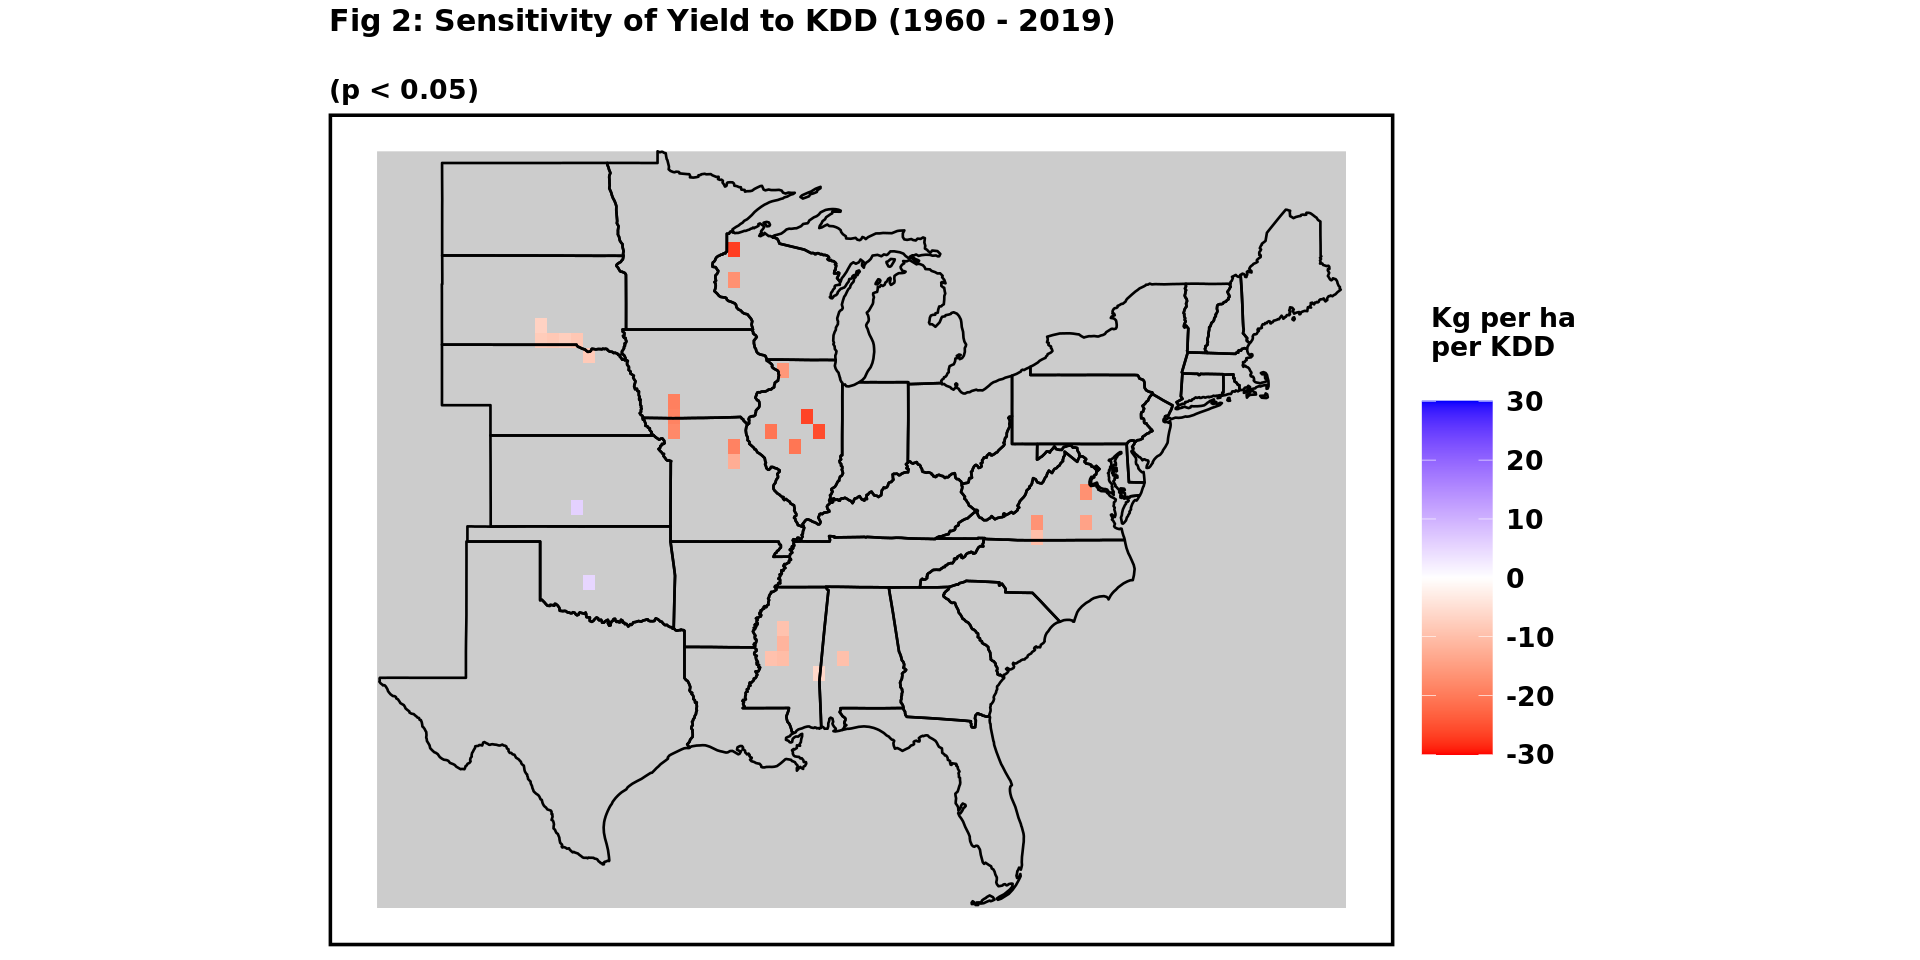

In [382]:
# Figure 2

df.mk <- as.data.frame(mk.ras, xy = T)
ggplot() + geom_raster(df.mk, mapping = aes(x=x, y=y, fill = layer)) + 
geom_sf(east, mapping = aes(geometry=geometry), fill = NA, lwd = 0.75, col = 'black') +
scale_fill_gradient2(' Kg per ha \n per KDD \n',limits = c(-30,30), low = 'red', high = 'blue', na.value = 'grey80') + 
labs(title = "Fig 2: Sensitivity of Yield to KDD (1960 - 2019) \n", subtitle = "(p < 0.05)") + theme_bw() +
theme(plot.title = element_text(size = 18, face = 'bold'), plot.subtitle = element_text(size = 16, face = 'bold'),
      legend.key.size = unit(1.5, 'cm'),#change legend key size
        legend.key.height = unit(1.5, 'cm'), #change legend key height
        legend.key.width = unit(1.5, 'cm'), #change legend key width
        legend.title = element_text(size=16, face = 'bold'), #change legend title font size
        legend.text = element_text(size=16, face = 'bold'),
        plot.caption=element_text(size=20, hjust=0.5, face = 'bold', margin=margin(15,0,0,0)),
        axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      panel.background=element_blank(),
      panel.border=element_rect(color = 'black', fill = NA, size =2),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      plot.background=element_blank()) 


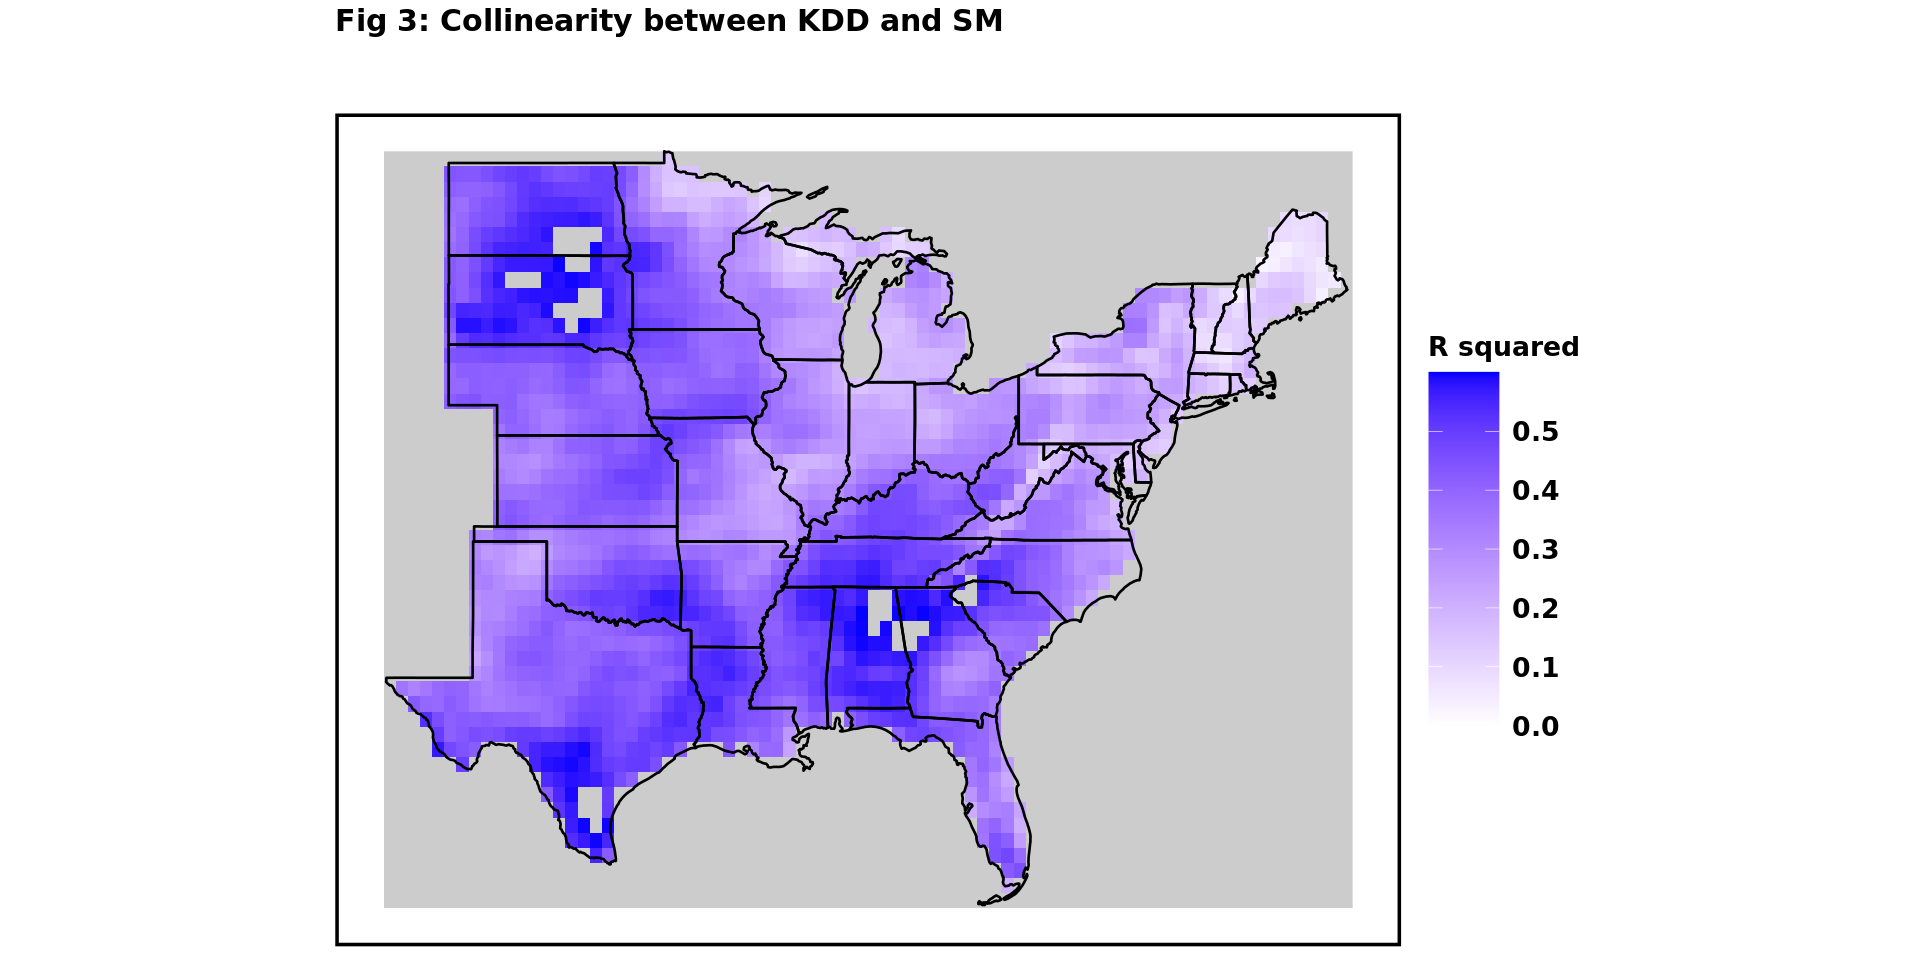

In [5]:
# plot R^2 of lm fit between sm and kdd (kdd vs sm), to identify strength of collinearity 

r <- readRDS('./model_outputs/r.sq.kdd_sm_1960_2019.rds')
df.r <- as.data.frame(r, xy = T)
ggplot() + geom_raster(df.r, mapping = aes(x=x, y=y, fill = layer)) + 
geom_sf(east, mapping = aes(geometry=geometry), fill = NA, lwd = 0.75, col = 'black') +
scale_fill_gradient2('R squared',limits = c(0,0.6), low = 'red', high = 'blue', na.value = 'grey80') + 
labs(title = "Fig 3: Collinearity between KDD and SM \n", subtitle = "") + theme_bw() +
theme(plot.title = element_text(size = 18, face = 'bold'), plot.subtitle = element_text(size = 16, face = 'bold'),
      legend.key.size = unit(1.5, 'cm'),#change legend key size
        legend.key.height = unit(1.5, 'cm'), #change legend key height
        legend.key.width = unit(1.5, 'cm'), #change legend key width
        legend.title = element_text(size=16, face = 'bold'), #change legend title font size
        legend.text = element_text(size=16, face = 'bold'),
        plot.caption=element_text(size=20, hjust=0.5, face = 'bold', margin=margin(15,0,0,0)),
        axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      panel.background=element_blank(),
      panel.border=element_rect(color = 'black', fill = NA, size =2),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      plot.background=element_blank()) 


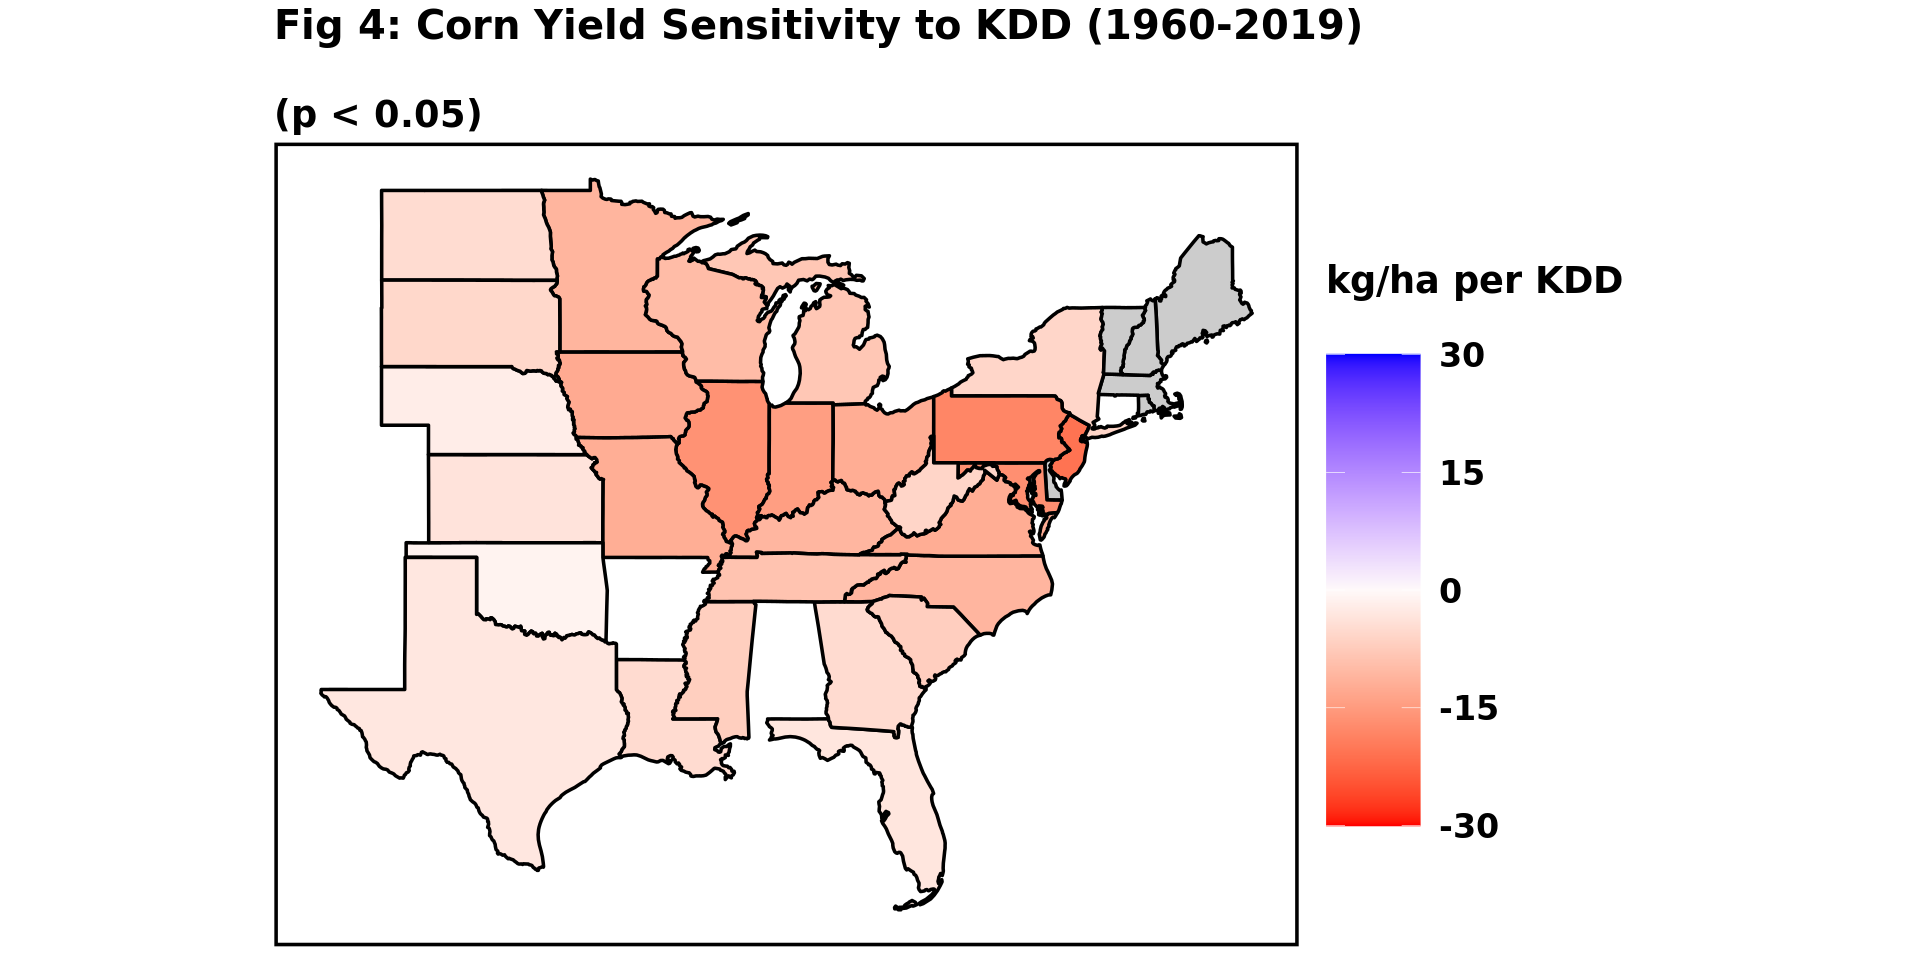

In [7]:
# Figure 4

df <- read.csv('./model_outputs/state_model.csv')
colnames(df)[1] <- 'STATEFP'
east.coefs <- merge(east, df, by = 'STATEFP')

ggplot() + geom_sf(east.coefs, mapping = aes(geometry = geometry, fill = kdd), lwd = 1, color = 'black') +
scale_fill_gradient2('kg/ha per KDD \n',limits = c(-30,30), breaks = seq(-45,45, by = 15), low = 'red', mid = 'snow', high = 'blue', na.value = 'grey80') + 
labs(title = "Fig 4: Corn Yield Sensitivity to KDD (1960-2019)\n", subtitle = "(p < 0.05)") + theme_bw() +
theme(plot.title = element_text(size = 24, face = 'bold'), plot.subtitle = element_text(size = 22, face = 'bold'),
      legend.key.size = unit(2, 'cm'),#change legend key size
        legend.key.height = unit(2, 'cm'), #change legend key height
        legend.key.width = unit(2, 'cm'), #change legend key width
        legend.title = element_text(size=22, face = 'bold'), #change legend title font size
        legend.text = element_text(size=20, face = 'bold'),
        plot.caption=element_text(size=20, hjust=0.5, face = 'bold', margin=margin(15,0,0,0)),
        axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      panel.background=element_blank(),
      panel.border=element_rect(color = 'black', fill = NA, size =2),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      plot.background=element_blank()) 



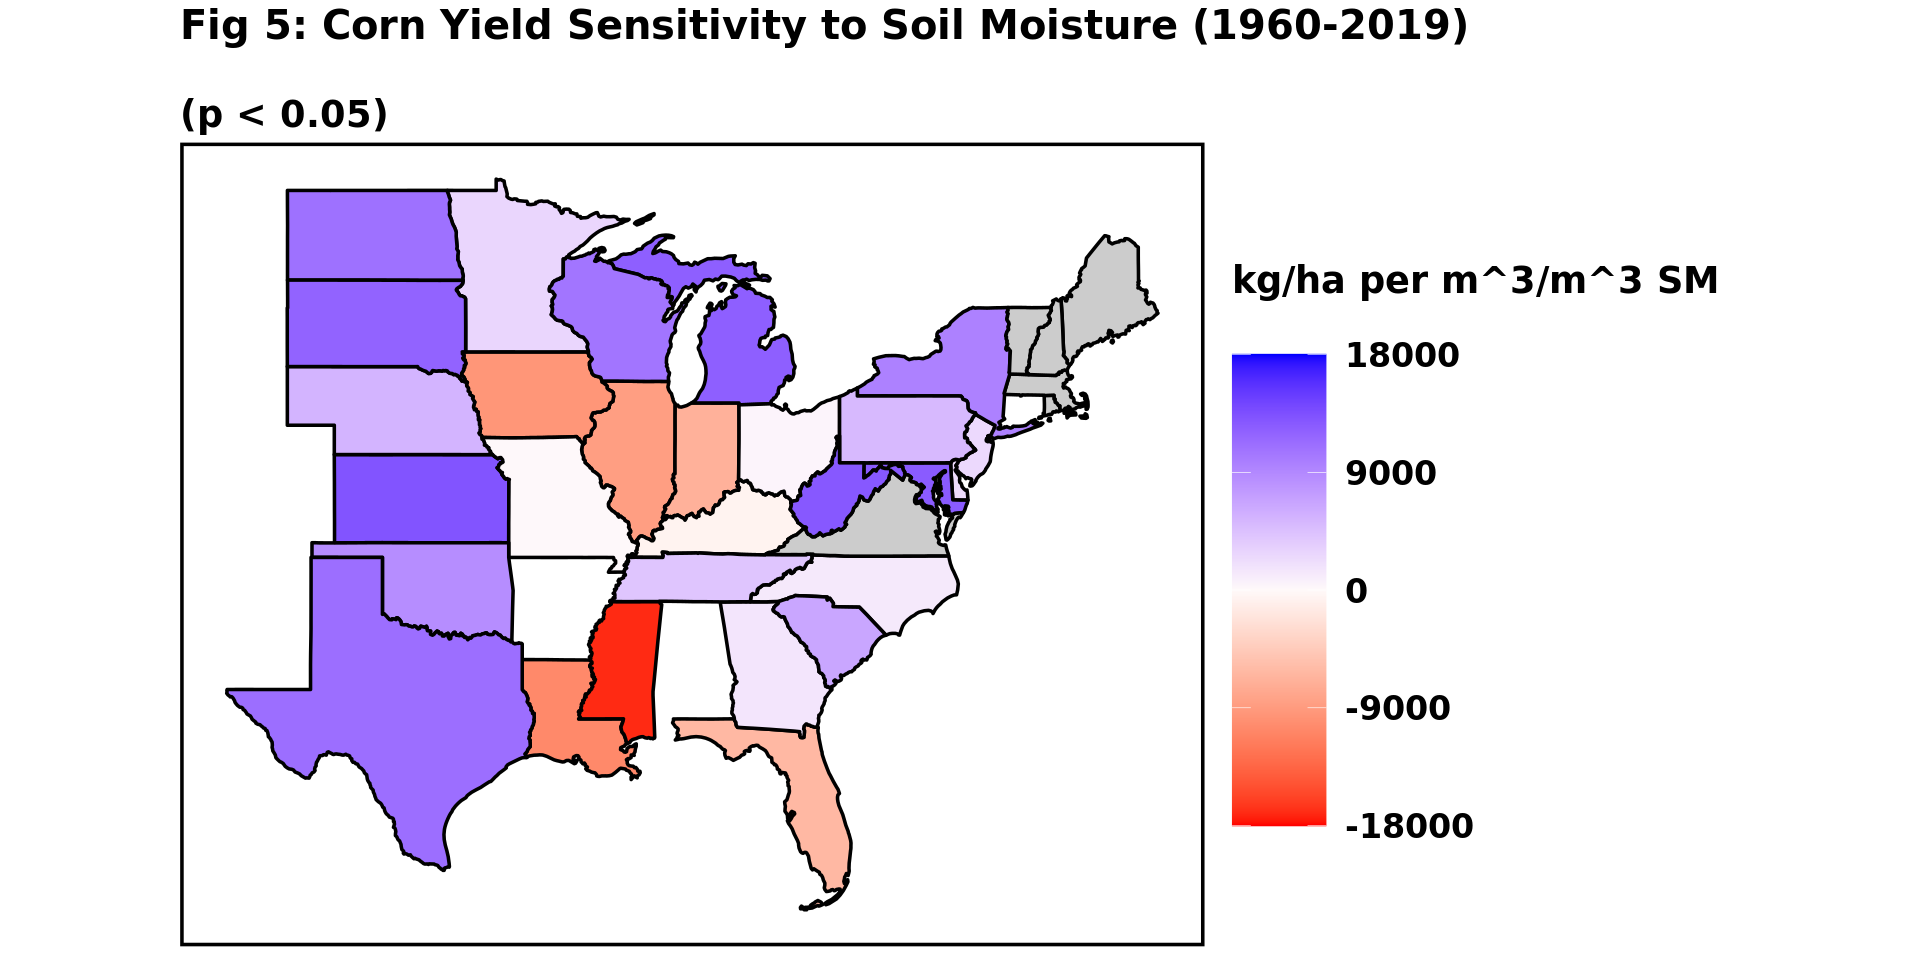

In [8]:
# Figure 5

df <- read.csv('./model_outputs/state_model.csv')
colnames(df)[1] <- 'STATEFP'
east.coefs <- merge(east, df, by = 'STATEFP')


ggplot() + geom_sf(east.coefs, mapping = aes(geometry = geometry, fill = sm), lwd = 1, color = 'black') +
scale_fill_gradient2('kg/ha per m^3/m^3 SM \n',limits = c(-18000,18000), breaks = seq(-18000,18000, by = 9000), low = 'red', mid = 'snow', high = 'blue', na.value = 'grey80') + 
labs(title = "Fig 5: Corn Yield Sensitivity to Soil Moisture (1960-2019)\n", subtitle = "(p < 0.05)") + theme_bw() +
theme(plot.title = element_text(size = 24, face = 'bold'), plot.subtitle = element_text(size = 22, face = 'bold'),
      legend.key.size = unit(2, 'cm'),#change legend key size
        legend.key.height = unit(2, 'cm'), #change legend key height
        legend.key.width = unit(2, 'cm'), #change legend key width
        legend.title = element_text(size=22, face = 'bold'), #change legend title font size
        legend.text = element_text(size=20, face = 'bold'),
        plot.caption=element_text(size=20, hjust=0.5, face = 'bold', margin=margin(15,0,0,0)),
        axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      panel.background=element_blank(),
      panel.border=element_rect(color = 'black', fill = NA, size =2),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      plot.background=element_blank()) 



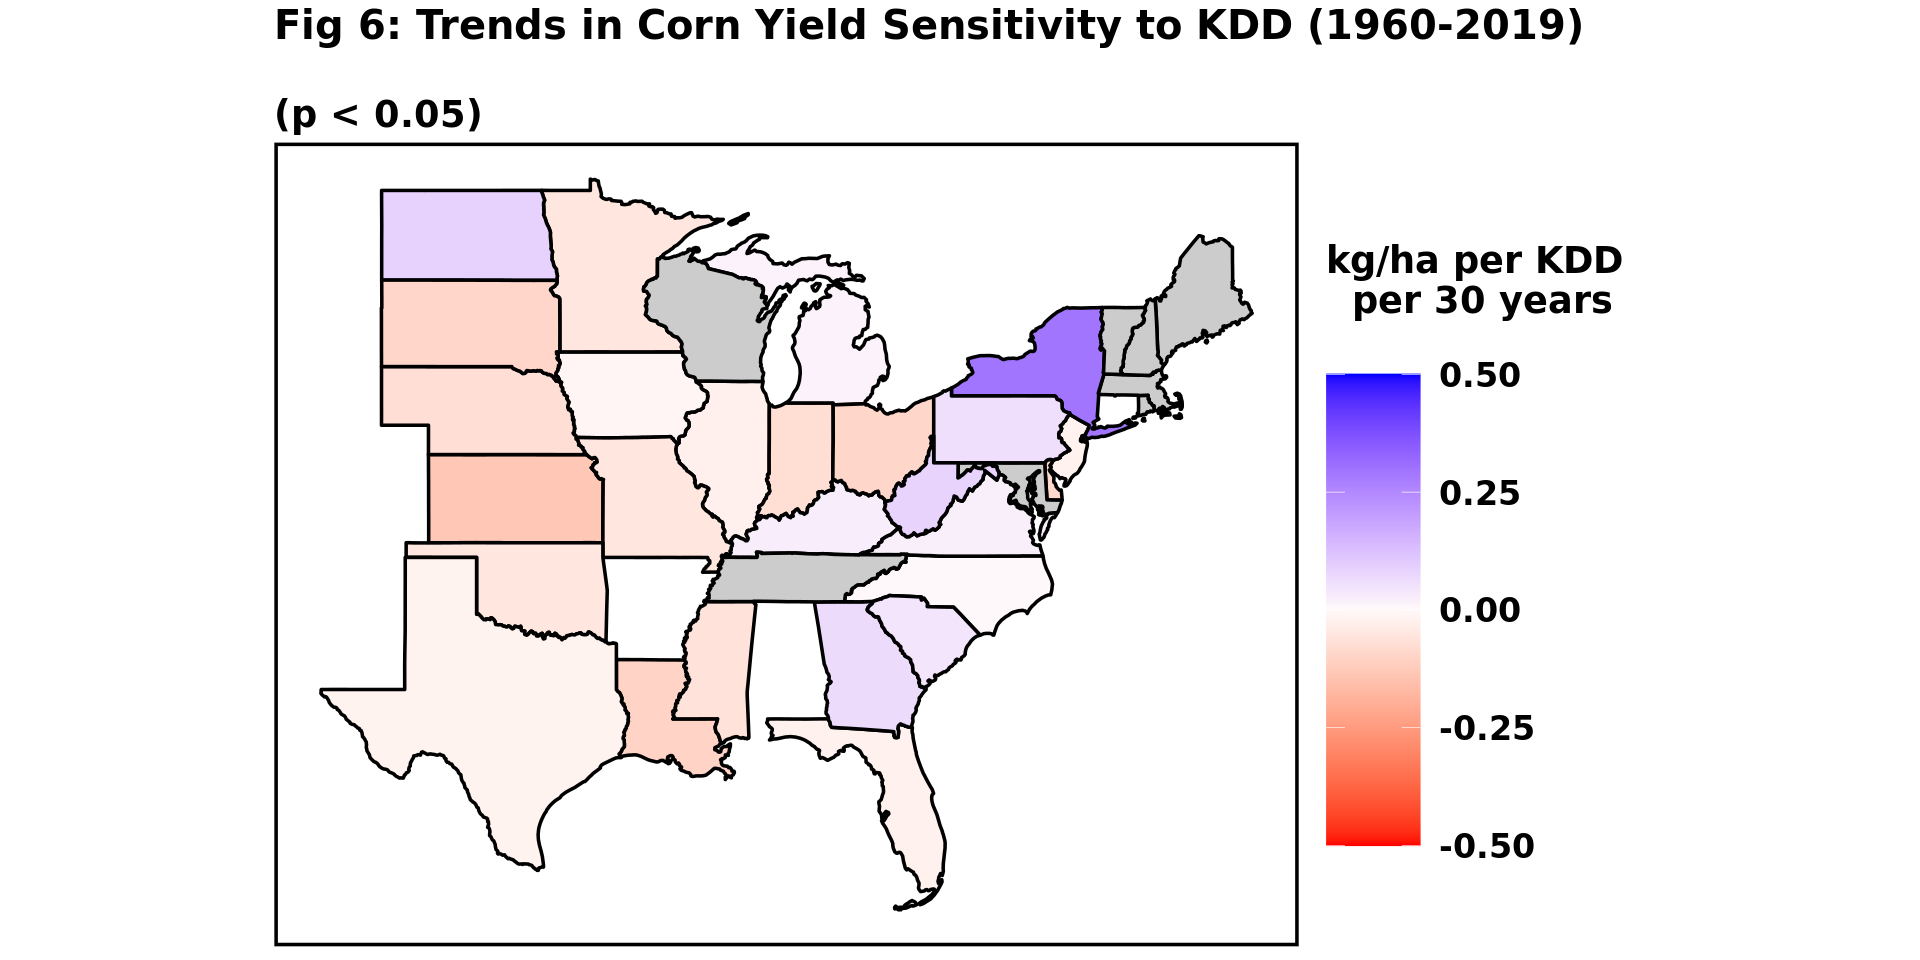

In [9]:
# Figure 6

state <- read.csv('./model_outputs/state_model_window.csv')
colnames(state)[1] <- 'STATEFP'
east.window <- merge(east, state, by = 'STATEFP')

ggplot() + geom_sf(east.window, mapping = aes(geometry = geometry, fill = kdd), lwd = 1, color = 'black') +
scale_fill_gradient2('kg/ha per KDD \n  per 30 years\n',limits = c(-0.5,0.5), breaks = seq(-0.5,0.5, by = 0.25), low = 'red', mid = 'snow', high = 'blue', na.value = 'grey80') + 
labs(title = "Fig 6: Trends in Corn Yield Sensitivity to KDD (1960-2019)\n", subtitle = "(p < 0.05)") + theme_bw() +
theme(plot.title = element_text(size = 24, face = 'bold'), plot.subtitle = element_text(size = 22, face = 'bold'),
      legend.key.size = unit(2, 'cm'),#change legend key size
        legend.key.height = unit(2, 'cm'), #change legend key height
        legend.key.width = unit(2, 'cm'), #change legend key width
        legend.title = element_text(size=22, face = 'bold'), #change legend title font size
        legend.text = element_text(size=20, face = 'bold'),
        plot.caption=element_text(size=20, hjust=0.5, face = 'bold', margin=margin(15,0,0,0)),
        axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      panel.background=element_blank(),
      panel.border=element_rect(color = 'black', fill = NA, size =2),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      plot.background=element_blank()) 



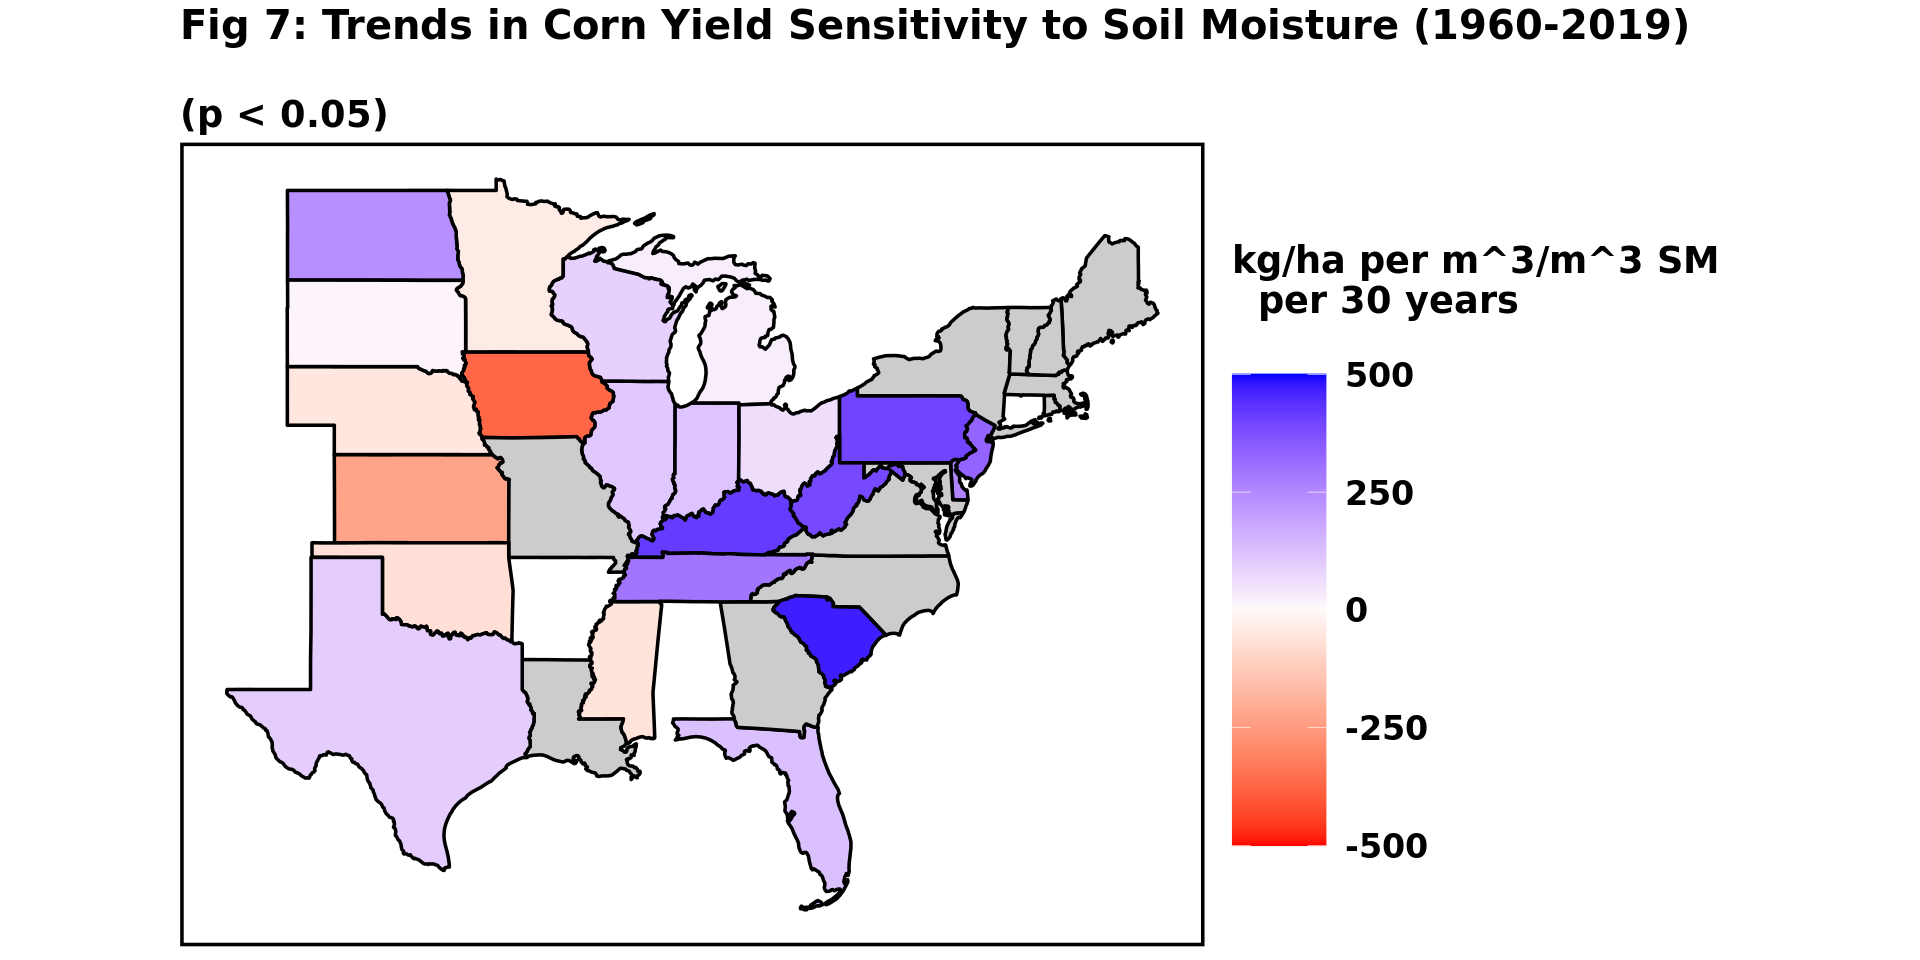

In [11]:
# Figure 7

state <- read.csv('./model_outputs/state_model_window.csv')
colnames(state)[1] <- 'STATEFP'
east.window <- merge(east, state, by = 'STATEFP')

ggplot() + geom_sf(east.window, mapping = aes(geometry = geometry, fill = gdd), lwd = 1, color = 'black') +
scale_fill_gradient2('kg/ha per m^3/m^3 SM \n  per 30 years\n',limits = c(-500,500), breaks = seq(-500,500, by = 250), low = 'red', mid = 'snow', high = 'blue', na.value = 'grey80') + 
labs(title = "Fig 7: Trends in Corn Yield Sensitivity to Soil Moisture (1960-2019)\n", subtitle = "(p < 0.05)") + theme_bw() +
theme(plot.title = element_text(size = 24, face = 'bold'), plot.subtitle = element_text(size = 22, face = 'bold'),
      legend.key.size = unit(2, 'cm'),#change legend key size
        legend.key.height = unit(2, 'cm'), #change legend key height
        legend.key.width = unit(2, 'cm'), #change legend key width
        legend.title = element_text(size=22, face = 'bold'), #change legend title font size
        legend.text = element_text(size=20, face = 'bold'),
        plot.caption=element_text(size=20, hjust=0.5, face = 'bold', margin=margin(15,0,0,0)),
        axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      panel.background=element_blank(),
      panel.border=element_rect(color = 'black', fill = NA, size =2),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      plot.background=element_blank()) 



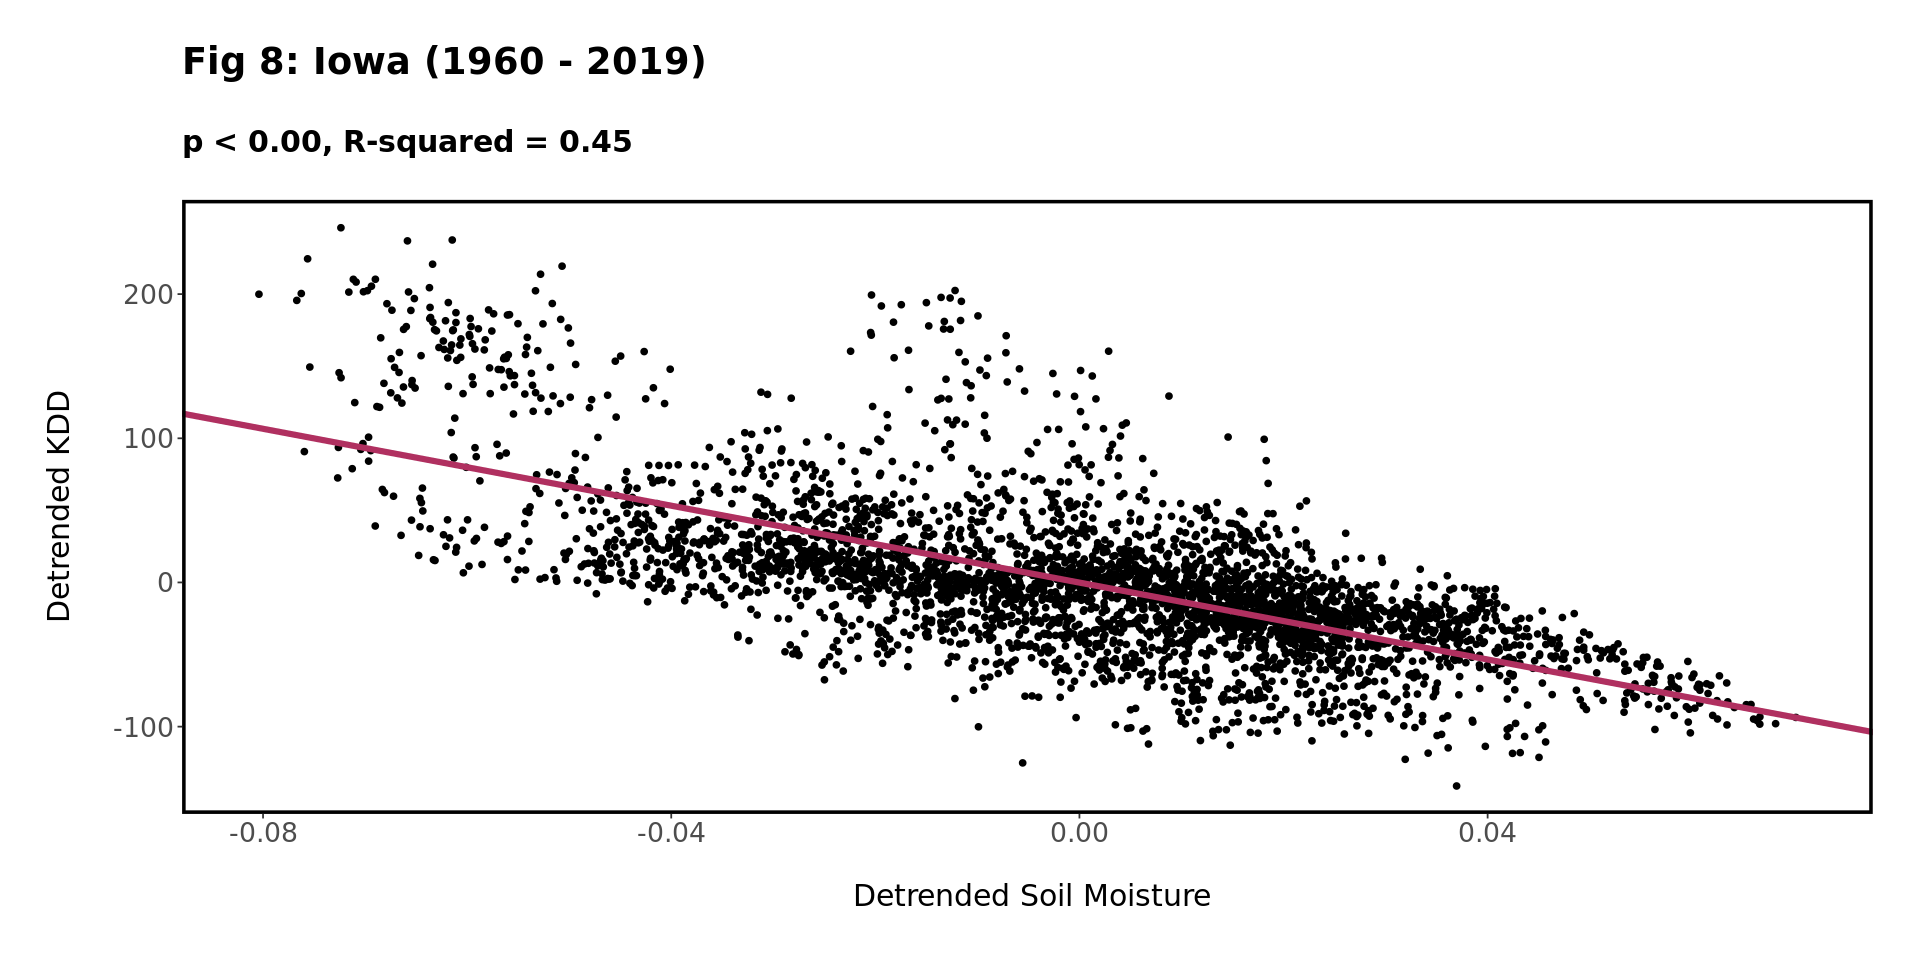

In [12]:
# Figure 8

df <- read.csv('./model_outputs/iowa.csv', header = T)
fit <- lm(kdv ~ smv, df)
#summary(fit)

ggplot(df, aes(x = smv, y = kdv)) + 
  geom_point() + 
  geom_abline(slope = coef(fit)[["smv"]], 
              intercept = coef(fit)[["(Intercept)"]], color = 'maroon', lwd = 1.75) +
                labs(title = 'Fig 8: Iowa (1960 - 2019)\n', subtitle = 'p < 0.00, R-squared = 0.45\n', x = "\n Detrended Soil Moisture", y = "Detrended KDD\n") + 
theme_bw() +
theme(plot.title = element_text(size = 22, face = 'bold'), plot.subtitle = element_text(size = 18, face = 'bold'),
      #legend.key.size = unit(1, 'cm'),#change legend key size
       # legend.key.height = unit(1, 'cm'), #change legend key height
       # legend.key.width = unit(1, 'cm'), #change legend key width
       # legend.title = element_text(size=14), #change legend title font size
       # legend.text = element_text(size=10),
       # axis.line=element_blank(),
      axis.text.x=element_text(size = 16),
      axis.text.y=element_text(size = 16),
      #axis.ticks=element_blank(),
      axis.title.x=element_text(size = 18),
      axis.title.y=element_text(size = 18),
      panel.background=element_blank(),
      panel.border=element_rect(color = 'black', fill = NA, size =2),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      plot.background=element_blank(),
     plot.margin = margin(1, 1, 1, 1, "cm"))